<a href="https://colab.research.google.com/github/ajay-del-bot/PythonAnalysis/blob/main/Model_Training_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import re 
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix


from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import webbrowser
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.downloader.download('vader_lexicon')
nltk.download('wordnet')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df_train = pd.read_csv('train.csv', encoding='utf-8')
df_train

,Unnamed: 0,tweets,likes,retweet,user,isVerified,place,time,tweets2,tweets3
0,0,"b""AAP's historic win in Chandigarh MC polls sh...",663,190,AnmolGaganMann,True,"Kharar, Punjab",2021-12-27 12:17:21,AAP's historic win in Chandigarh MC polls show...,AAP's historic win in Chandigarh MC polls show...
1,1,"b'Ahead of UP elections, BJP is planning a mas...",14,9,news18dotcom,True,India,2021-12-27 11:40:00,"Ahead of UP elections, BJP is planning a massi...","Ahead of UP elections, BJP is planning a massi..."
2,2,b'CPI(M) general secretary Sitaram Yechury sai...,39,10,SwarajyaMag,True,India,2021-12-27 11:55:00,CPI(M) general secretary Sitaram Yechury said ...,CPI(M) general secretary Sitaram Yechury said ...
3,3,b'.@BJP4India top brass in UP: PM @narendramo...,1,0,thetribunechd,True,Chandigarh,2021-12-28 05:20:53,.@BJP4India top brass in UP: PM @narendramodi...,.@BJP4India top brass in UP: PM @narendramodi...
4,4,b'BJP to register bigger win this time in UP A...,3,0,DyCMGoUP,True,"Lucknow, India",2021-12-28 05:10:46,BJP to register bigger win this time in UP Ass...,BJP to register bigger win this time in UP Ass...
...,...,...,...,...,...,...,...,...,...,...
11294,11294,b'@ScottWalker @packers All I want for XMAS is...,4,0,JamesHLawson3,False,"Smithfield, NC",2021-12-25 21:01:09,@ScottWalker @packers All I want for XMAS is f...,@ScottWalker @packers All I want for XMAS is f...
11295,11295,b'@Winback24 Was just thinking this. Something...,0,0,estahh67,False,"St. Albert, Alberta",2021-12-25 20:59:28,@Winback24 Was just thinking this. Something c...,@Winback24 Was just thinking this. Something c...
11296,11296,b'Performed duty as a member Election Commissi...,1,0,bzsolangi,False,"Karachi,Pakistan.",2021-12-25 20:55:08,Performed duty as a member Election Commission...,Performed duty as a member Election Commission...
11297,11297,b'Respected Members and Dear Friends With God...,2,0,GuptaRuchi31,False,NaN,2021-12-25 20:52:57,Respected Members and Dear Friends With God\x...,Respected Members and Dear Friends With God\x...


In [ ]:
df_train.drop(columns=['tweets', 'tweets2', 'Unnamed: 0'], axis=1, inplace=True)
df_train.rename(columns = {'tweets3':'tweets'}, inplace = True)

In [ ]:
df_train.head()

,likes,retweet,user,isVerified,place,time,tweets
0,663,190,AnmolGaganMann,True,"Kharar, Punjab",2021-12-27 12:17:21,AAP's historic win in Chandigarh MC polls show...
1,14,9,news18dotcom,True,India,2021-12-27 11:40:00,"Ahead of UP elections, BJP is planning a massi..."
2,39,10,SwarajyaMag,True,India,2021-12-27 11:55:00,CPI(M) general secretary Sitaram Yechury said ...
3,1,0,thetribunechd,True,Chandigarh,2021-12-28 05:20:53,.@BJP4India top brass in UP: PM @narendramodi...
4,3,0,DyCMGoUP,True,"Lucknow, India",2021-12-28 05:10:46,BJP to register bigger win this time in UP Ass...


In [ ]:
#df_train['tweets'] = df_train['tweets'].str.decode('utf-8')

In [22]:
from textblob import TextBlob
lemmatizer = WordNetLemmatizer()
sid = SentimentIntensityAnalyzer()

In [ ]:
def calcSentiments(text):
    ans=sid.polarity_scores(text)
    return ans['compound']

In [ ]:
def calTextBloblSentiments(text):
  ans = TextBlob(text)
  pol = ans.sentiment.polarity
  if pol>0:
    return 'positive'
  elif pol==0:
    return 'neutral'
  else:
    return 'negative'


In [ ]:
# def getTextAnalysis(ans):
#     text=sid.polarity_scores(ans)
#     if (text['pos']>text['neu'] and text['pos']>text['neg']):
#         vader_sentiment = 'positive'
#     elif (text['neu']>text['pos'] and text['neu']>text['neg']):
#         vader_sentiment = 'neutral'
#     else:
#         vader_sentiment = 'negative'
#     return vader_sentiment

In [ ]:
def getTextAnalysis(text):
    if (text >= 0.05):
        vader_sentiment = 'positive'
    elif (text < 0.05 and text > -0.05):
        vader_sentiment = 'neutral'
    elif (text <= -0.05):
        vader_sentiment = 'negative'
    return vader_sentiment

In [23]:
def dataCleaning(text):
        
        TEXT = (text.
    		replace('\\xe2\\x80\\x99', "'").
            replace('\\xc3\\xa9', 'e').
            replace('\\xe2\\x80\\x90', '-').
            replace('\\xe2\\x80\\x91', '-').
            replace('\\xe2\\x80\\x92', '-').
            replace('\\xe2\\x80\\x93', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x98', "'").
            replace('\\xe2\\x80\\x9b', "'").
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9d', '"').
            replace('\\xe2\\x80\\x9e', '"').
            replace('\\xe2\\x80\\x9f', '"').
            replace('\\xe2\\x80\\xa6', '...').
            replace('\\xe2\\x80\\xb2', "'").
            replace('\\xe2\\x80\\xb3', "'").
            replace('\\xe2\\x80\\xb4', "'").
            replace('\\xe2\\x80\\xb5', "'").
            replace('\\xe2\\x80\\xb6', "'").
            replace('\\xe2\\x80\\xb7', "'").
            replace('\\xe2\\x81\\xba', "+").
            replace('\\xe2\\x81\\xbb', "-").
            replace('\\xe2\\x81\\xbc', "=").
            replace('\\xe2\\x81\\xbd', "(").
            replace('\\xe2\\x81\\xbe', ")")

                 )
        tweet = TEXT.lower()

        # Replaces URLs with the ''
        tweet = re.sub(r'((www\.[\S]+)|(https?:\\)|(http\S+))', '', tweet)
        # tweet = re.sub(r'\\xe2\\x80\\x9.',r'', tweet)
        # tweet = re.sub(r'\xe2\x99\x88', r'', tweet)
        # tweet = re.sub(r'\.',r' ', tweet)  
        
        #Replace @handle with the word ''
        tweet = re.sub(r'@[\S]+', '', tweet)
        # # Replaces #hashtag with hashtag
        tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
        # # Remove RT (retweet)
        tweet = re.sub(r'\brt\b', '', tweet)
        # # Replace 2+ dots with space
        tweet = re.sub(r'\.{2,}', ' ', tweet)
        # # Replace ,  with space
        tweet = re.sub(r'\,', ' ', tweet)
        # # Strip space, " and ' from tweet
        tweet = tweet.strip(' "\'')
        # # Replace multiple spaces with a single space
        tweet = re.sub(r'\s+', ' ', tweet)
        
        tweet = re.sub(r'&amp;', 'and', tweet)
        tweet = re.sub(r'\\n', ' ', tweet)
        
        tweet =[lemmatizer.lemmatize(word) for word in tweet.split() if word not in stopwords.words('english')]
        tweet = ' '.join(tweet)
        return tweet

In [ ]:
df_train = df_train.sort_values('likes', ascending=False).drop_duplicates('tweets').sort_index()

In [ ]:
df_train['cleaned_tweet']=df_train['tweets'].apply(dataCleaning)

In [ ]:
df_train['cleaned_tweet'][1]

'ahead election bjp planning massive campaign redevelop religious site associated lord parshuram reach brahmin community. reports.'

In [ ]:
df_with_Vader = df_train.copy()
df_with_TextBlob = df_train.copy()

In [ ]:
df_train

,likes,retweet,user,isVerified,place,time,tweets,cleaned_tweet
0,663,190,AnmolGaganMann,True,"Kharar, Punjab",2021-12-27 12:17:21,AAP's historic win in Chandigarh MC polls show...,aap's historic win chandigarh mc poll show peo...
1,14,9,news18dotcom,True,India,2021-12-27 11:40:00,"Ahead of UP elections, BJP is planning a massi...",ahead election bjp planning massive campaign r...
2,39,10,SwarajyaMag,True,India,2021-12-27 11:55:00,CPI(M) general secretary Sitaram Yechury said ...,cpi(m) general secretary sitaram yechury said ...
3,1,0,thetribunechd,True,Chandigarh,2021-12-28 05:20:53,.@BJP4India top brass in UP: PM @narendramodi...,. top brass up: pm pitch party upcoming assemb...
4,3,0,DyCMGoUP,True,"Lucknow, India",2021-12-28 05:10:46,BJP to register bigger win this time in UP Ass...,bjp register bigger win time assembly poll cla...
...,...,...,...,...,...,...,...,...
11294,4,0,JamesHLawson3,False,"Smithfield, NC",2021-12-25 21:01:09,@ScottWalker @packers All I want for XMAS is f...,want xmas democrat win larger majority house s...
11295,0,0,estahh67,False,"St. Albert, Alberta",2021-12-25 20:59:28,@Winback24 Was just thinking this. Something c...,thinking this. something catastrophic happen e...
11296,1,0,bzsolangi,False,"Karachi,Pakistan.",2021-12-25 20:55:08,Performed duty as a member Election Commission...,performed duty member election commission kara...
11297,2,0,GuptaRuchi31,False,NaN,2021-12-25 20:52:57,Respected Members and Dear Friends With God\x...,respected member dear friend god's grace bless...


In [ ]:
df_with_Vader['label']=df_with_Vader['cleaned_tweet'].apply(calcSentiments)

In [ ]:
df_with_Vader['Sentiment']=df_with_Vader['label'].apply(getTextAnalysis)

In [ ]:
df_with_Vader['Sentiment'].value_counts()

positive    5555
negative    3010
neutral     2734
Name: Sentiment, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 


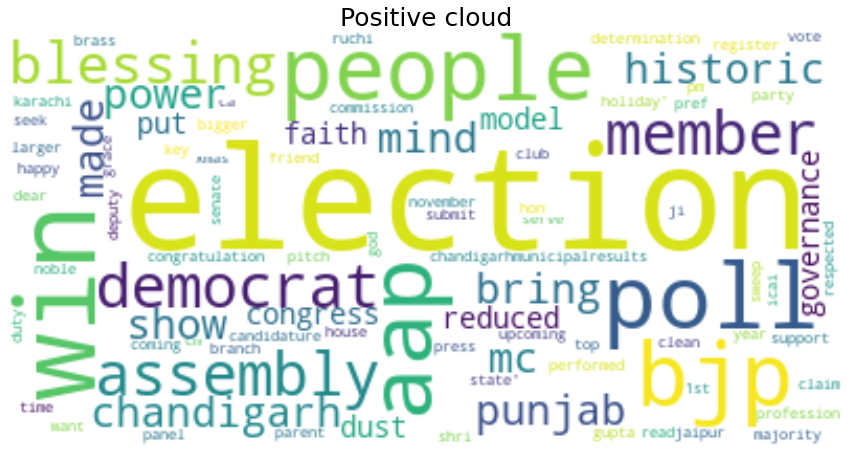

In [ ]:
text = df_with_Vader[df_with_Vader['Sentiment']=='positive']['cleaned_tweet'].values

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))

# Display the generated image:
# the matplotlib way:
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('Positive cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

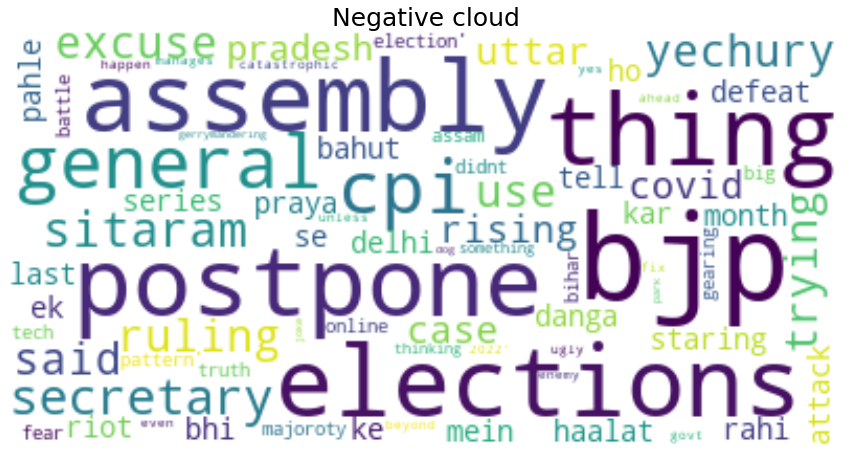

In [ ]:
text = df_with_Vader[df_with_Vader['Sentiment']=='negative']['cleaned_tweet'].values
stopwords.update(["jaye", "jaise", "election"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))

# Display the generated image:
# the matplotlib way:
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('Negative cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
df_with_TextBlob['Sentiment'] = df_train['cleaned_tweet'].apply(calTextBloblSentiments)

In [ ]:
df_with_TextBlob

,likes,retweet,user,isVerified,place,time,tweets,cleaned_tweet,Sentiment
0,663,190,AnmolGaganMann,True,"Kharar, Punjab",2021-12-27 12:17:21,AAP's historic win in Chandigarh MC polls show...,aap's historic win chandigarh mc poll show peo...,positive
1,14,9,news18dotcom,True,India,2021-12-27 11:40:00,"Ahead of UP elections, BJP is planning a massi...",ahead election bjp planning massive campaign r...,neutral
2,39,10,SwarajyaMag,True,India,2021-12-27 11:55:00,CPI(M) general secretary Sitaram Yechury said ...,cpi(m) general secretary sitaram yechury said ...,positive
3,1,0,thetribunechd,True,Chandigarh,2021-12-28 05:20:53,.@BJP4India top brass in UP: PM @narendramodi...,. top brass up: pm pitch party upcoming assemb...,positive
4,3,0,DyCMGoUP,True,"Lucknow, India",2021-12-28 05:10:46,BJP to register bigger win this time in UP Ass...,bjp register bigger win time assembly poll cla...,positive
...,...,...,...,...,...,...,...,...,...
11294,4,0,JamesHLawson3,False,"Smithfield, NC",2021-12-25 21:01:09,@ScottWalker @packers All I want for XMAS is f...,want xmas democrat win larger majority house s...,positive
11295,0,0,estahh67,False,"St. Albert, Alberta",2021-12-25 20:59:28,@Winback24 Was just thinking this. Something c...,thinking this. something catastrophic happen e...,neutral
11296,1,0,bzsolangi,False,"Karachi,Pakistan.",2021-12-25 20:55:08,Performed duty as a member Election Commission...,performed duty member election commission kara...,positive
11297,2,0,GuptaRuchi31,False,NaN,2021-12-25 20:52:57,Respected Members and Dear Friends With God\x...,respected member dear friend god's grace bless...,positive


In [ ]:
df_with_TextBlob['Sentiment'].value_counts()

neutral     4746
positive    4190
negative    2363
Name: Sentiment, dtype: int64

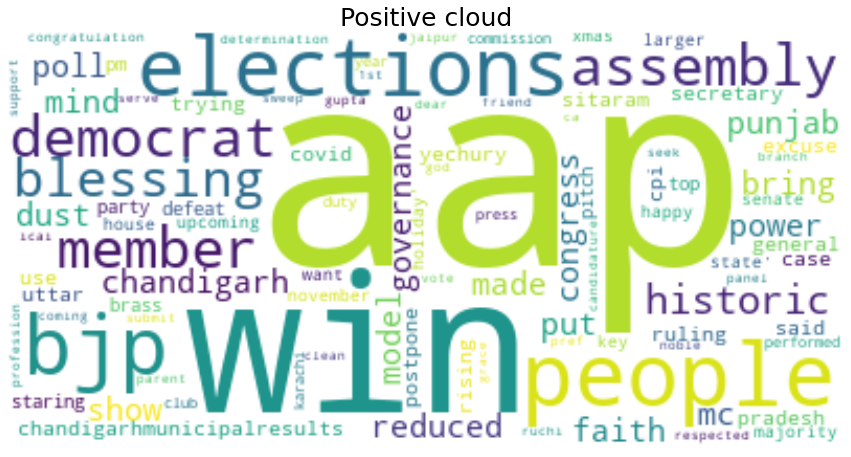

In [ ]:
text = df_with_TextBlob[df_with_TextBlob['Sentiment']=='positive']['cleaned_tweet'].values

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))

# Display the generated image:
# the matplotlib way:
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('Positive cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

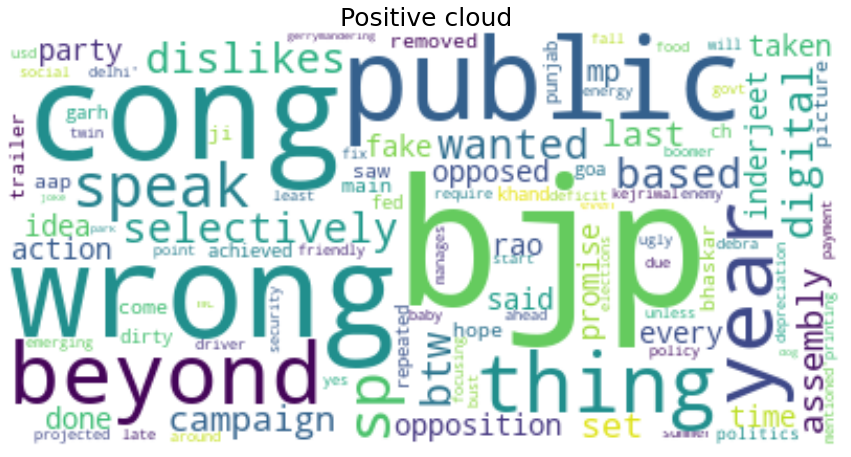

In [ ]:
text = df_with_TextBlob[df_with_TextBlob['Sentiment']=='negative']['cleaned_tweet'].values

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))

# Display the generated image:
# the matplotlib way:
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('Positive cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df_with_Vader['Sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [ ]:
df_with_Vader['Sentiment']= label_encoder.fit_transform(df_with_Vader['Sentiment'])
df_with_Vader['isVerified'] = label_encoder.fit_transform(df_with_Vader['isVerified'])

In [ ]:
df_with_Vader['Sentiment'].unique()

array([2, 1, 0])

In [ ]:
df_with_Vader.head()

,likes,retweet,user,isVerified,place,time,tweets,cleaned_tweet,label,Sentiment
0,663,190,AnmolGaganMann,1,"Kharar, Punjab",2021-12-27 12:17:21,AAP's historic win in Chandigarh MC polls show...,aap's historic win chandigarh mc poll show peo...,0.7650,2
1,14,9,news18dotcom,1,India,2021-12-27 11:40:00,"Ahead of UP elections, BJP is planning a massi...",ahead election bjp planning massive campaign r...,0.0258,1
2,39,10,SwarajyaMag,1,India,2021-12-27 11:55:00,CPI(M) general secretary Sitaram Yechury said ...,cpi(m) general secretary sitaram yechury said ...,-0.5574,0
3,1,0,thetribunechd,1,Chandigarh,2021-12-28 05:20:53,.@BJP4India top brass in UP: PM @narendramodi...,. top brass up: pm pitch party upcoming assemb...,0.5423,2
4,3,0,DyCMGoUP,1,"Lucknow, India",2021-12-28 05:10:46,BJP to register bigger win this time in UP Ass...,bjp register bigger win time assembly poll cla...,0.5859,2


In [ ]:
df = df_with_Vader.drop({'tweets', 'user', 'place', 'time', 'label', 'retweet'}, axis=1)

In [ ]:
df

,likes,isVerified,cleaned_tweet,Sentiment
0,663,1,aap's historic win chandigarh mc poll show peo...,2
1,14,1,ahead election bjp planning massive campaign r...,1
2,39,1,cpi(m) general secretary sitaram yechury said ...,0
3,1,1,top brass up: pm pitch party upcoming assembly...,2
4,3,1,bjp register bigger win time assembly poll cla...,2
...,...,...,...,...
11294,4,0,want xmas democrat win larger majority house s...,2
11295,0,0,thinking something catastrophic happen electio...,0
11296,1,0,performed duty member election commission kara...,2
11297,2,0,respected member dear friend god grace blessin...,2


In [ ]:
df.to_pickle('df.pkl')

In [39]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop({'Sentiment'}, axis=1), df['Sentiment'], test_size=0.2, random_state=42)
print("TRAIN size:", len(X_train))
print("TEST size:", len(X_test))

TRAIN size: 8176
TEST size: 2045


In [ ]:
# Create Function Transformer to use Feature Union
def get_numeric_data(x):
    return [record[:-2].astype(float) for record in x.values]

def get_text_data(x):
    return [record[-1] for record in x.values]

In [ ]:
transfomer_numeric = FunctionTransformer(get_numeric_data)
transformer_text = FunctionTransformer(get_text_data)

In [ ]:
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', transfomer_numeric)
            ])),
             ('text_features', Pipeline([
                ('selector', transformer_text),
                ('vec', TfidfVectorizer(analyzer='word', 
                       stop_words ='english'))
            ]))
         ])),
    ('clf', RandomForestClassifier())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function get_numeric_data at 0x7f159d080d40>))])),
                                                ('text_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function get_text_data at 0x7f159d080f80>)),
                                                                 ('vec',
                                                                  TfidfVectorizer(stop_words='english'))]))])),
                ('clf', RandomForestClassifier())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred

array([2, 2, 0, ..., 1, 0, 2])

In [ ]:
y_pred2 = pipeline.predict_proba(X_test)

In [ ]:
y_pred2

array([[0.2 , 0.36, 0.44],
       [0.16, 0.11, 0.73],
       [0.61, 0.02, 0.37],
       ...,
       [0.08, 0.67, 0.25],
       [0.58, 0.16, 0.26],
       [0.12, 0.39, 0.49]])

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.715


In [ ]:
class MultiNB:
    def __init__(self,alpha=1):
        self.alpha = alpha
    
    def _prior(self): # CHECKED
        """
        Calculates prior for each unique class in y. P(y)
        """
        P = np.zeros((self.n_classes_))
        _, self.dist = np.unique(self.y,return_counts=True)
        for i in range(self.classes_.shape[0]):
            P[i] = self.dist[i] / self.n_samples
        return P
            
    def fit(self, X, y): # CHECKED, matches with sklearn
        """
        Calculates the following things- 
            class_priors_ is list of priors for each y.
            N_yi: 2D array. Contains for each class in y, the number of time each feature i appears under y.
            N_y: 1D array. Contains for each class in y, the number of all features appear under y.
            
        params
        ------
        X: 2D array. shape(n_samples, n_features)
            Multinomial data
        y: 1D array. shape(n_samples,). Labels must be encoded to integers.
        """
        self.y = y
        self.n_samples, self.n_features = X.shape
        self.classes_ = np.unique(y)
        self.n_classes_ = self.classes_.shape[0]
        self.class_priors_ = self._prior()
        
        # distinct values in each features
        self.uniques = []
        for i in range(self.n_features):
            tmp = np.unique(X[:,i])
            self.uniques.append( tmp )
            
        self.N_yi = np.zeros((self.n_classes_, self.n_features)) # feature count
        self.N_y = np.zeros((self.n_classes_)) # total count 
        for i in self.classes_: # x axis
            indices = np.argwhere(self.y==i).flatten()
            columnwise_sum = []
            for j in range(self.n_features): # y axis
                columnwise_sum.append(np.sum(X[indices,j]))
                
            self.N_yi[i] = columnwise_sum # 2d
            self.N_y[i] = np.sum(columnwise_sum) # 1d
            
    def _theta(self, x_i, i, h):
        """
        Calculates theta_yi. aka P(xi | y) using eqn(1) in the notebook.
        
        params
        ------
        x_i: int. 
            feature x_i
            
        i: int.
            feature index. 
            
        h: int or string.
            a class in y
        
        returns
        -------
        theta_yi: P(xi | y)
        """
        
        Nyi = self.N_yi[h,i]
        Ny  = self.N_y[h]
        
        numerator = Nyi + self.alpha
        denominator = Ny + (self.alpha * self.n_features)
        
        return  (numerator / denominator)**x_i
    
    def _likelyhood(self, x, h):
        """
        Calculates P(E|H) = P(E1|H) * P(E2|H) .. * P(En|H).
        
        params
        ------
        x: array. shape(n_features,)
            a row of data.
        h: int. 
            a class in y
        """
        tmp = []
        for i in range(x.shape[0]):
            tmp.append(self._theta(x[i], i,h))
        
        return np.prod(tmp)
    
    def predict(self, X):
        samples, features = X.shape
        self.predict_proba = np.zeros((samples,self.n_classes_))
        
        for i in range(X.shape[0]):
            joint_likelyhood = np.zeros((self.n_classes_))
            
            for h in range(self.n_classes_):
                joint_likelyhood[h]  = self.class_priors_[h] * self._likelyhood(X[i],h) # P(y) P(X|y) 
                
            denominator = np.sum(joint_likelyhood)
            
            for h in range(self.n_classes_):
                numerator = joint_likelyhood[h]
                self.predict_proba[i,h] = (numerator / denominator)
            
        indices = np.argmax(self.predict_proba,axis=1)
        return self.classes_[indices]

In [ ]:
# def pipeline(X,y,X_test, y_test, alpha):
#     """
#     Sklearn Sanity Check
#     """
#     print("-"*20,'Sklearn',"-"*20)
#     clf = MultinomialNB(alpha=alpha)
#     clf.fit(X,y)
#     sk_y = clf.predict(X_test)
#     print("Feature Count \n",clf.feature_count_)
#     print("Class Log Prior ",clf.class_log_prior_)
#     print('Accuracy ',accuracy_score(y_test, sk_y),sk_y)
#     print(clf.predict_proba(X_test))
#     print("-"*20,'Custom',"-"*20)
#     nb = MultiNB(alpha=alpha)
#     nb.fit(X,y)
#     yhat = nb.predict(X_test)
#     me_score = accuracy_score(y_test, yhat)
#     print("Feature Count\n",nb.N_yi)
#     print("Class Log Prior ",np.log(nb.class_priors_))
#     print('Accuracy ',me_score,yhat)
#     print(nb.predict_proba)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(df_train['cleaned_tweet']).toarray()
y = label_encoder.fit_transform(df_train['Sentiment']).ravel()
print(X.shape,y.shape)

(10221, 20450) (10221,)


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(7665, 20450) (2556, 20450) (7665,) (2556,)


In [ ]:
sk = MultinomialNB().fit(X_train2,y_train2)
sk.score(X_test2,y_test2)

0.6682316118935837

In [ ]:
%%time
me = MultiNB()
me.fit(X_train2, y_train2)
yhat2 = me.predict(X_test2)
print(accuracy_score(y_test2,yhat2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in double_scalars


0.668622848200313
CPU times: user 3min 48s, sys: 417 ms, total: 3min 48s
Wall time: 3min 50s


In [ ]:
rf = RandomForestClassifier().fit(X_train2,y_train2)
rf.score(X_test2,y_test2)

0.735133020344288

In [ ]:
#@title Default title text
import pickle
# create an iterator object with write permission - model.pkl
with open('rf.pkl', 'wb') as files:
    pickle.dump(rf, files)

In [ ]:
#@title
with open('multiNB.pkl', 'wb') as files:
    pickle.dump(me, files)

In [ ]:
#@title
with open('multiNB2.pkl', 'wb') as files:
    pickle.dump(sk, files)

In [ ]:
#@title
with open('rf2.pkl', 'wb') as files:
    pickle.dump(pipeline, files)

In [12]:
#@title Unzipping of files
from zipfile import ZipFile
file_name = '/content/1Jan_to_5Jan.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

file_name = '/content/6Jan_to_10Jan.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

file_name = '/content/11Jan_to_15Jan.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [13]:
df_test = pd.read_csv('1Jan_to_5Jan/UP-BJP')
df_test

,Datetime,Text,User
0,2022-01-04 23:21:18+00:00,My take on #SuryaNamaskar\n#AIMPLB @INCIndia @...,shoaib_rubaru
1,2022-01-04 23:12:50+00:00,@CTRavi_BJP Does corona return from BJP state ...,Ashant_Sharma
2,2022-01-04 22:55:40+00:00,Story of Uttar Pradesh: The assembly election ...,BroNews24
3,2022-01-04 22:48:45+00:00,@Sushantify @BJP4India @republic I have been s...,OzVish1
4,2022-01-04 21:01:09+00:00,@srivatsayb @wasim2126 Modi to day in very cru...,SatishD12256161
...,...,...,...
2461,2022-01-04 14:56:01+00:00,@Angry_Bot14 @myogiadityanath @narendramodi NO...,Js_rajput1
2462,2022-01-04 14:55:56+00:00,@myogiadityanath Yes right,DineshG10997104
2463,2022-01-04 14:55:45+00:00,@upwestbjp @CaptAbhimanyu @myogiadityanath Gre...,bhagasaraajay03
2464,2022-01-04 14:55:20+00:00,If Mumbai Police Have Not Done Justice With Su...,Angry_Bot14


In [14]:
df_test2 = pd.read_csv('6Jan_to_10Jan/UP-BJP.csv')
df_test2

,Datetime,Text,User
0,2022-01-09 22:08:22+00:00,@jusdoNothing If only Hindus can realise this....,MissMystique007
1,2022-01-09 22:03:19+00:00,Without any exit poll aired or any survey cond...,punitks05
2,2022-01-09 19:54:16+00:00,I see UP Elections can become full of horse tr...,hrnurtweets2
3,2022-01-09 19:29:33+00:00,UP + Yogi = Uttam Pradesh &amp; Good Governanc...,nandlala559
4,2022-01-09 19:22:14+00:00,I think BJP in uttar pradesh might regain powe...,ssawasthi
...,...,...,...
2499,2022-01-09 14:20:39+00:00,"@CNNnews18 @myogiadityanath what about jain,sh...",DILIPDONGAONKAR
2500,2022-01-09 14:20:34+00:00,@shalabhmani @myogiadityanath this is the fell...,Mystery49541030
2501,2022-01-09 14:20:12+00:00,Can’t wait to see @NidhiKNDTV ji to one day ha...,moronhumor
2502,2022-01-09 14:19:10+00:00,@myogiadityanath It's a request from the natio...,SabyasachiDha17


In [15]:
df_test3 = pd.read_csv('11Jan_to_15Jan/UP-BJP.csv')
df_test3

,Datetime,Text,User
0,2022-01-14 23:58:51+00:00,@Khushe83059819 @KTRTRS @krishanKTRS @ysathish...,mittugaram
1,2022-01-14 23:29:43+00:00,UP BJP Candidates List 2022: 172 names finalis...,jeguru1
2,2022-01-14 23:05:04+00:00,Can BJP survive this exodus of its MLAs in Utt...,MarketsCafe
3,2022-01-14 23:04:25+00:00,"It appears the ""Khalai Makhlooq"" has arrived i...",Roohan_Ahmed
4,2022-01-14 22:38:00+00:00,bjp: UP Elections: BJP will pay the price for ...,newsindian_in
...,...,...,...
4868,2022-01-14 13:23:02+00:00,@SunitaS85123235 @narendramodi @myogiadityanat...,Manvind40428518
4869,2022-01-14 13:22:26+00:00,@myogiadityanath Beautiful,gaurkr2015
4870,2022-01-14 13:22:17+00:00,@myogiadityanath Is this corona distancing or ...,watekar
4871,2022-01-14 13:21:42+00:00,@jankibaat1 @pradip103 @IndiaNews_itv No. I'm ...,ChandraRaghuvir


In [16]:
df_test = pd.concat([df_test2, df_test],axis=0,ignore_index=True)
df_test

,Datetime,Text,User
0,2022-01-09 22:08:22+00:00,@jusdoNothing If only Hindus can realise this....,MissMystique007
1,2022-01-09 22:03:19+00:00,Without any exit poll aired or any survey cond...,punitks05
2,2022-01-09 19:54:16+00:00,I see UP Elections can become full of horse tr...,hrnurtweets2
3,2022-01-09 19:29:33+00:00,UP + Yogi = Uttam Pradesh &amp; Good Governanc...,nandlala559
4,2022-01-09 19:22:14+00:00,I think BJP in uttar pradesh might regain powe...,ssawasthi
...,...,...,...
4965,2022-01-04 14:56:01+00:00,@Angry_Bot14 @myogiadityanath @narendramodi NO...,Js_rajput1
4966,2022-01-04 14:55:56+00:00,@myogiadityanath Yes right,DineshG10997104
4967,2022-01-04 14:55:45+00:00,@upwestbjp @CaptAbhimanyu @myogiadityanath Gre...,bhagasaraajay03
4968,2022-01-04 14:55:20+00:00,If Mumbai Police Have Not Done Justice With Su...,Angry_Bot14


In [17]:
df_test = pd.concat([df_test3, df_test],axis=0,ignore_index=True)
df_test

,Datetime,Text,User
0,2022-01-14 23:58:51+00:00,@Khushe83059819 @KTRTRS @krishanKTRS @ysathish...,mittugaram
1,2022-01-14 23:29:43+00:00,UP BJP Candidates List 2022: 172 names finalis...,jeguru1
2,2022-01-14 23:05:04+00:00,Can BJP survive this exodus of its MLAs in Utt...,MarketsCafe
3,2022-01-14 23:04:25+00:00,"It appears the ""Khalai Makhlooq"" has arrived i...",Roohan_Ahmed
4,2022-01-14 22:38:00+00:00,bjp: UP Elections: BJP will pay the price for ...,newsindian_in
...,...,...,...
9838,2022-01-04 14:56:01+00:00,@Angry_Bot14 @myogiadityanath @narendramodi NO...,Js_rajput1
9839,2022-01-04 14:55:56+00:00,@myogiadityanath Yes right,DineshG10997104
9840,2022-01-04 14:55:45+00:00,@upwestbjp @CaptAbhimanyu @myogiadityanath Gre...,bhagasaraajay03
9841,2022-01-04 14:55:20+00:00,If Mumbai Police Have Not Done Justice With Su...,Angry_Bot14


In [18]:
df_test.drop_duplicates(subset ="Text",
                     keep = 'first', inplace = True)

In [19]:
len(df_test)

9379

In [20]:
df_test['Text'].loc[1]

'UP BJP Candidates List 2022: 172 names finalised for Uttar Pradesh elections? Check latest\xa0news https://t.co/5TVEaGhEqU'

In [24]:
df_test['cleaned_tweet']=df_test['Text'].apply(dataCleaning)

In [25]:
df_test['cleaned_tweet'].loc[1]

'bjp candidate list 2022: 172 name finalised uttar pradesh elections? check latest news'

In [26]:
df_test2 = df_test.copy()

In [27]:
df_test.drop(columns =['Datetime', 'Text', 'User'], axis=1, inplace=True)

In [ ]:

actual_df_Vader = df_with_Vader[['cleaned_tweet', 'Sentiment']]
actual_df_TextBlob = df_with_TextBlob[['cleaned_tweet', 'Sentiment']]
actual_df_Vader.to_csv('Actual_df_Vader.csv', index=False)
actual_df_TextBlob.to_csv('Actual_df_TextBlob.csv', index=False)

In [28]:
actual_df_Vader = pd.read_csv('Actual_df_Vader.csv')

In [29]:
actual_df_Vader.head()

,cleaned_tweet,Sentiment
0,aap's historic win chandigarh mc poll show peo...,2
1,ahead election bjp planning massive campaign r...,1
2,cpi(m) general secretary sitaram yechury said ...,0
3,. top brass up: pm pitch party upcoming assemb...,2
4,bjp register bigger win time assembly poll cla...,2


In [30]:
len(actual_df_Vader)

11299

In [31]:
actual_df_Vader['cleaned_tweet'].isnull().sum()

1

In [32]:
actual_df_Vader.dropna(subset=['cleaned_tweet'], inplace=True)

In [33]:
df_test.head()
df_test.dropna(subset=['cleaned_tweet'], inplace=True)
len(df_test)

9379

In [34]:
df_test['cleaned_tweet'].isnull().sum()

0

In [35]:
total_data = pd.concat([actual_df_Vader, df_test],axis=0,ignore_index=True)
total_data

,cleaned_tweet,Sentiment
0,aap's historic win chandigarh mc poll show peo...,2.0
1,ahead election bjp planning massive campaign r...,1.0
2,cpi(m) general secretary sitaram yechury said ...,0.0
3,. top brass up: pm pitch party upcoming assemb...,2.0
4,bjp register bigger win time assembly poll cla...,2.0
...,...,...
20672,justice 4 ssr vote,NaN
20673,yes right,NaN
20674,great effort,NaN
20675,mumbai police done justice sushant singh rajpu...,NaN


In [36]:
total_data['cleaned_tweet'].isnull().sum()

0

In [37]:
total_data.dropna(subset=['cleaned_tweet'], inplace=True)

In [41]:
cv = CountVectorizer()
vec = cv.fit_transform(total_data['cleaned_tweet'])
print(vec.shape, total_data.shape)

(20677, 25066) (20677, 2)


In [42]:
X=vec[:len(actual_df_Vader)]
y=actual_df_Vader.Sentiment
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.85)

In [43]:
rf_with_cv = RandomForestClassifier(n_estimators=65)
rf_with_cv.fit(X_train,y_train)
pred = rf_with_cv.predict(X_test)
accuracy_score(pred,y_test)

0.7705014749262536

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvec=TfidfVectorizer()
vec1 = tfidfvec.fit_transform(total_data["cleaned_tweet"])

In [45]:
X=vec1[:len(actual_df_Vader)]
y=actual_df_Vader.Sentiment
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.85)

In [46]:
rf_with_tfidf=RandomForestClassifier(n_estimators=65)
rf_with_tfidf.fit(X_train,y_train)
pred=rf_with_tfidf.predict(X_test)
accuracy_score(pred,y_test)

0.7634218289085546

In [47]:
test_vec = vec[len(actual_df_Vader):]
test_vec

<9379x25066 sparse matrix of type '<class 'numpy.int64'>'
	with 132686 stored elements in Compressed Sparse Row format>

In [ ]:
with open('rf_with_cv.pkl', 'wb') as files:
    pickle.dump(rf_with_cv, files)
with open('rf_with_tfidf.pkl', 'wb') as files:
    pickle.dump(rf_with_tfidf, files)

In [48]:
predictions = rf_with_cv.predict(test_vec)
predictions

array([1, 1, 2, ..., 2, 1, 1])

In [49]:
len(predictions)

9379

In [50]:
submission = pd.DataFrame()
submission['Tweet'] = df_test['cleaned_tweet']
submission['Sentiment'] = predictions
submission['Date'] = df_test2['Datetime']
submission

,Tweet,Sentiment,Date
0,election would answer bjp.,1,2022-01-14 23:58:51+00:00
1,bjp candidate list 2022: 172 name finalised ut...,1,2022-01-14 23:29:43+00:00
2,bjp survive exodus mlas uttar pradesh? obc min...,2,2022-01-14 23:05:04+00:00
3,"appears ""khalai makhlooq"" arrived india too. i...",2,2022-01-14 23:04:25+00:00
4,bjp: elections: bjp pay price ignoring backwar...,0,2022-01-14 22:38:00+00:00
...,...,...,...
9838,justice 4 ssr vote,1,2022-01-04 14:56:01+00:00
9839,yes right,2,2022-01-04 14:55:56+00:00
9840,great effort,2,2022-01-04 14:55:45+00:00
9841,mumbai police done justice sushant singh rajpu...,1,2022-01-04 14:55:20+00:00


In [51]:
submission.to_csv('UP-BJP_prediction.csv', index=False)

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df_UP_BJP = pd.read_csv('UP-BJP_prediction.csv')

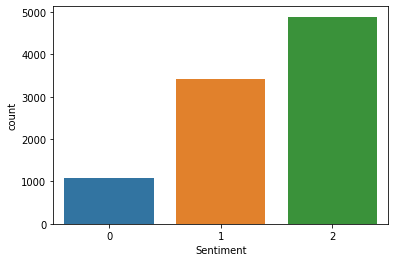

In [53]:
sns.countplot(x ='Sentiment', data = df_UP_BJP)

In [54]:
def get_range(date):
  if (date > '2022-01-01') and (date <= '2022-01-05'):
    return '1Jan-5Jan'
  elif (date > '2022-01-06') and (date <= '2022-01-10'):
    return '6Jan-10Jan'
  else:
    return '11Jan-15Jan'

In [55]:
df_UP_BJP['Range'] = df_UP_BJP['Date'].apply(get_range)

In [74]:
df_UP_BJP

,Tweet,Sentiment,Date,Range,sample
0,election would answer bjp.,1,2022-01-14,11Jan-15Jan,1
1,bjp candidate list 2022: 172 name finalised ut...,1,2022-01-14,11Jan-15Jan,1
2,bjp survive exodus mlas uttar pradesh? obc min...,2,2022-01-14,11Jan-15Jan,1
3,"appears ""khalai makhlooq"" arrived india too. i...",2,2022-01-14,11Jan-15Jan,1
4,bjp: elections: bjp pay price ignoring backwar...,0,2022-01-14,11Jan-15Jan,1
...,...,...,...,...,...
9374,justice 4 ssr vote,1,2022-01-04,1Jan-5Jan,1
9375,yes right,2,2022-01-04,1Jan-5Jan,1
9376,great effort,2,2022-01-04,1Jan-5Jan,1
9377,mumbai police done justice sushant singh rajpu...,1,2022-01-04,1Jan-5Jan,1


In [72]:
def clean_date(date):
  date = date.replace(date[11:], "")
  return date

In [73]:
df_UP_BJP['Date'] = df_UP_BJP['Date'].apply(clean_date)

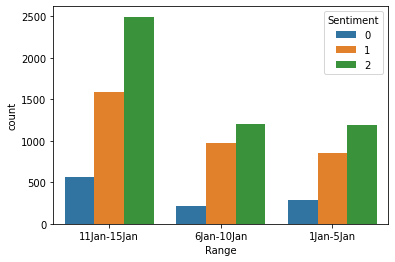

In [57]:
sns.countplot(x ='Range', data = df_UP_BJP, hue='Sentiment')

In [66]:
df_UP_BJP['Sentiment'].value_counts()

2    4888
1    3419
0    1072
Name: Sentiment, dtype: int64

In [60]:
df_UP_BJP['sample'] = 1

In [67]:
df_sum = df_UP_BJP.groupby(['Range', 'Sentiment']).sum()

In [68]:
df_sum

sample
Range       Sentiment        
11Jan-15Jan 0             565
            1            1586
            2            2497
1Jan-5Jan   0             291
            1             857
            2            1191
6Jan-10Jan  0             216
            1             976
            2            1200

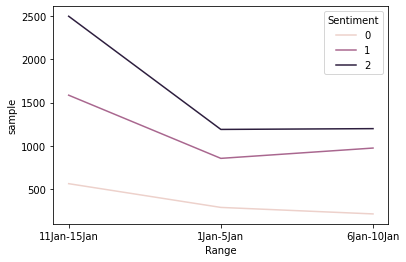

In [71]:
sns.lineplot( x = "Range",
             y = "sample",
             data = df_sum, hue="Sentiment");

In [84]:
df_sum2 = df_UP_BJP.groupby(['Date', 'Sentiment']).sum()

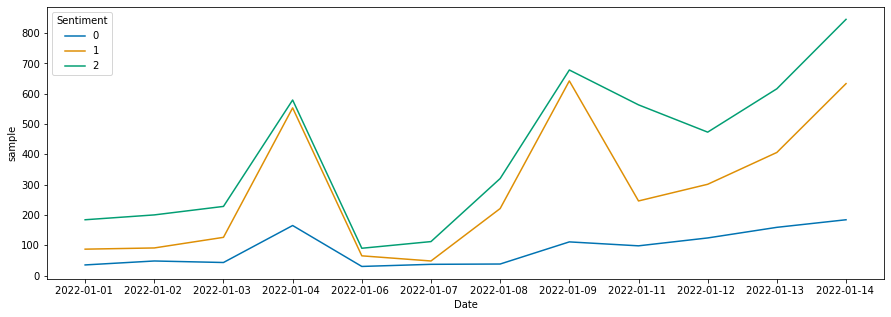

In [83]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot( x = "Date",
             y = "sample",
             data = df_sum2, hue="Sentiment", ax=ax, palette='colorblind')
plt.show()